In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ece143/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/ece143


# import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('cleaned_data.csv', encoding='ISO-8859-1')
data.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,0,0,0,Not difficult at all,0,0,...,Male,25,Employed,BC,USA,Reddit,online real life friends,0,33,3.0
1,0,0,0,0,0,0,0,Not difficult at all,1,1,...,Male,18,CollegeStu,HS,USA,Reddit,online real life friends,0,31,23.0
2,0,0,0,1,0,1,0,Not difficult at all,5,3,...,Male,35,Employed,HS,Canada,Reddit,online strangers,2,13,33.0
3,0,0,0,0,0,0,1,Not difficult at all,2,5,...,Male,30,Employed,BC,Bosnia and Herzegovina,Reddit,All,1,19,8.0
4,3,3,3,2,0,1,3,Extremely difficult,6,6,...,Male,24,CollegeStu,HS,Germany,Other,online acquaintances,15,9,37.0


In [ ]:
df = data.copy()

In [ ]:
df = df[['Gender', 'Age', 'Work', 'Degree', 'Residence', 'Platform', 'earnings', 'whyplay', 'League', 'Reference', 'Playstyle',
                   'Game', 'Hours', 'Narcissism',
                   'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE',
                   'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',
                   'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
                   'GAD_T', 'SWL_T', 'SPIN_T'
                  ]]

# SPIN
* 21-30 points: Mild
* 31-40 points: Moderate
* 41-50 points: Severe
* 51-68 points: Extreme

<ipython-input-7-fcedbbe90013>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['SPIN_T'], bins=[-1, 20, 30, 40, 50, 68], labels=['None', 'mild', 'moderate', 'severe', 'extreme']))['SPIN_T'].count()


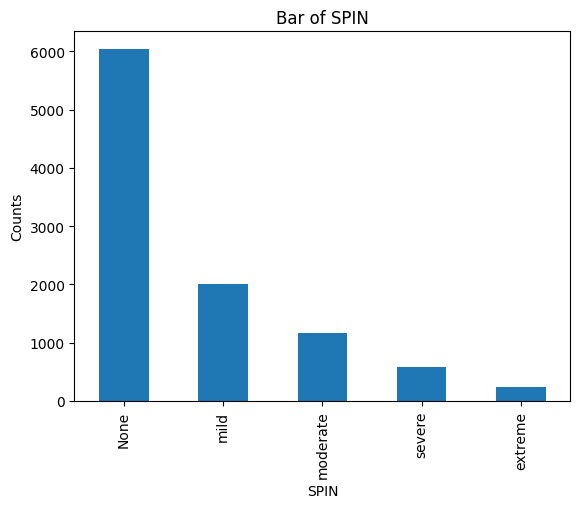

In [ ]:
group_counts = data.groupby(pd.cut(data['SPIN_T'], bins=[-1, 20, 30, 40, 50, 68], labels=['None', 'mild', 'moderate', 'severe', 'extreme']))['SPIN_T'].count()

group_counts.plot(kind='bar')

plt.xlabel("SPIN")
plt.ylabel("Counts")
plt.title("Bar of SPIN")
plt.show()

In [ ]:
data['SPIN_T'] = pd.cut(data['SPIN_T'],bins=[-1, 20, 30, 40, 50, 68], labels=['None', 'mild', 'moderate', 'severe', 'extreme']).astype(str)

# SPIN DecisionTreeClassifier

In [ ]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Age,Work,Degree,Residence,Platform,earnings,whyplay,League,Reference,...,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,GAD_T,SWL_T,SPIN_T
0,1,25,1,0,97,2,1,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,3.0
1,1,18,0,2,97,2,1,1,7,2,...,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0,31,23.0
2,1,35,1,2,15,2,1,2,7,2,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2,13,33.0
3,1,30,1,0,11,2,1,1,7,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,19,8.0
4,1,24,0,2,32,2,1,1,2,1,...,3.0,3.0,1.0,1.0,3.0,1.0,1.0,15,9,37.0


In [ ]:
X_SPIN = df.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])
y_SPIN = df['SPIN_T']

X_train, X_test, y_train, y_test = train_test_split(X_SPIN, y_SPIN, random_state=42, test_size=0.2)

dtc = DecisionTreeClassifier(random_state=42, max_depth=10)
model = dtc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[33,  0,  0, ...,  0,  0,  0],
       [ 2, 13, 11, ...,  0,  0,  0],
       [ 1,  6, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        33
         1.0       0.57      0.35      0.43        37
         2.0       0.29      0.31      0.30        39
         3.0       0.19      0.27      0.22        48
         4.0       0.24      0.26      0.25        62
         5.0       0.27      0.19      0.22        64
         6.0       0.11      0.10      0.11        59
         7.0       0.12      0.17      0.14        66
         8.0       0.13      0.15      0.14        61
         9.0       0.09      0.06      0.07        66
        10.0       0.13      0.16      0.14        62
        11.0       0.09      0.12      0.10        85
        12.0       0.09      0.10      0.10        70
        13.0       0.05      0.03      0.04        60
        14.0       0.10      0.12      0.11        73
        15.0       0.07      0.11      0.09        65
        16.0       0.04      0.03      0.04        68
        17.0       0.06    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from tabulate import tabulate

features = pd.DataFrame(dtc.feature_importances_, index=X_SPIN.columns, columns=['Importance'])
top_10_features = features.nlargest(10, 'Importance')

table_str = tabulate(top_10_features, headers=["Top 10 Features", "Importance"], tablefmt="grid")

table_lines = table_str.split("\n")
print("\n".join(table_lines))


+-------------------+--------------+
| Top 10 Features   |   Importance |
+===================+==============+
| SPIN8             |    0.0538547 |
+-------------------+--------------+
| SPIN14            |    0.0467082 |
+-------------------+--------------+
| SPIN2             |    0.0439524 |
+-------------------+--------------+
| SPIN11            |    0.0425591 |
+-------------------+--------------+
| SPIN7             |    0.0421903 |
+-------------------+--------------+
| SPIN9             |    0.0416082 |
+-------------------+--------------+
| Hours             |    0.040225  |
+-------------------+--------------+
| SPIN5             |    0.039018  |
+-------------------+--------------+
| SPIN15            |    0.0387638 |
+-------------------+--------------+
| SPIN6             |    0.0387563 |
+-------------------+--------------+


# SPIN DecisionTreeRegressor

In [ ]:
X_SPIN2 = df.iloc[:, :44]
y_SPIN2 = df['SPIN_T']

X_train, X_test, y_train, y_test = train_test_split(X_SPIN2, y_SPIN2, random_state=42, test_size=0.2)

dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
model2 = dtr.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [ ]:
mean_absolute_error(y_pred2, y_test)

4.199191029467737

In [ ]:
mean_squared_error(y_pred2, y_test)

29.545265133811423

In [ ]:
r2_score(y_pred2, y_test)

0.7938687193903209